<h3>Prerequisite for Collab</h3>

In [1]:
!pip install joblib

In [2]:
!pip install pyomo

In [3]:
!pip install highspy

In [4]:
!pip install pyscipopt

<h3>Prerequisite for Conda Installation</h3>

In [5]:
#On Mac Terminal: conda create -n optim_env python=3.10
#conda activate optim_env
#conda install -c conda-forge pyomo scip
#conda install -c conda-forge glpk     # Linear / MILP solver
#conda install -c conda-forge highs    # Linear / Quadratic solver
#conda install -c conda-forge ipopt    # Nonlinear solver
#conda install -c conda-forge scip     # MINLP solver
#conda install networkx
#conda install conda-forge::matplotlib

# **I. Network Analysis**

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import time

# Step 1: Create graph
G2 = nx.Graph()

# Step 2: Define node data with BOTH position and label
# Each entry: node_id: {"pos": (x, y), "label": "..."}
node_data = {
    1:  {"pos": (-4.559058, 15.174809), "label": "Route de Matadi (border Kinshasa)"},
    2:  {"pos": (-4.442848, 15.255100), "label": "Triangle Matadi Kibala"},
    3:  {"pos": (-4.406924, 15.256513), "label": "UPN"},
    4:  {"pos": (-4.349325, 15.238810), "label": "Av. de l'École – Binza"},
    5:  {"pos": (-4.328773, 15.252333), "label": "Mont Ngaliema"},
    6:  {"pos": (-4.310907, 15.288488), "label": "Bd du 30 Juin"},
    7:  {"pos": (-4.299709, 15.319240), "label": "Gare Centrale"},
    8:  {"pos": (-4.398246, 15.276497), "label": "Selembao (Auto Stop)"},
    9:  {"pos": (-4.381511, 15.282728), "label": "Sanatorium"},
    10: {"pos": (-4.337062, 15.295951), "label": "Pierre Mulele"},
    11: {"pos": (-4.395099, 15.307741), "label": "Triangle Campus"},
    12: {"pos": (-4.389760, 15.314763), "label": "Rond Point Ngaba"},
    13: {"pos": (-4.336819, 15.326397), "label": "Av. de l'Université"},
    14: {"pos": (-4.331834, 15.314427), "label": "Bd Triomphal"},
    15: {"pos": (-4.393572, 15.333011), "label": "Lemba"},
    16: {"pos": (-4.375441, 15.344869), "label": "Échangeur 1"},
    17: {"pos": (-4.397829, 15.393514), "label": "Masina"},
    18: {"pos": (-4.405498, 15.423430), "label": "Av. Ndjoku"},
    19: {"pos": (-4.391380, 15.446782), "label": "Aéroport Ndjili"},
    20: {"pos": (-4.384103, 15.470908), "label": "Nsele"},
    21: {"pos": (-4.209434, 15.578420), "label": "RP Nsele"},
    22: {"pos": (-4.202280, 15.613246), "label": "Menkao"},
    23: {"pos": (-4.051282, 15.558907), "label": "Maluku"},
    # 23 intentionally omitted
    24: {"pos": (-4.472585, 15.281341), "label": "Arrêt Gare"},
    25: {"pos": (-4.420154, 15.307442), "label": "UNIKIN"},
    26: {"pos": (-4.461385, 15.288240), "label": "Kimwenza 2"},
    27: {"pos": (-4.484759, 15.219752), "label": "Benseke"},
    28: {"pos": (-4.447334, 15.249644), "label": "Wenze Matadi Kibala"},
    29: {"pos": (-4.329183, 15.337959), "label": "Limete PL"},
    30: {"pos": (-4.353936, 15.335540), "label": "Limete R"},
    
}

# Step 3: Add nodes with attributes
for node, attrs in node_data.items():
    G2.add_node(node, **attrs)  # adds both 'pos' and 'label'

# Step 4: Define edges with names
edges = [
    (1, 27, {"name": "Route de Matadi - Benseke"}),
    (27, 28, {"name": "Benseke - Wenze Matadi Kibala"}),
    (28, 2, {"name": "Wenze (Matadi Kibala) - Triangle (Cité Verte)"}),
    (2, 3, {"name": "Matadi Kibala - UPN"}),
    (3, 4, {"name": "UPN - Binza"}),
    (4, 5, {"name": "Binza - Mont Ngaliema"}),
    (5, 6, {"name": "Boulevard du 30 Juin"}),
    (6, 7, {"name": "24 - Gare Centrale"}),
    (3, 8, {"name": "UPN - Selembao"}),
    (8, 9, {"name": "Sanatorium - Université"}),
    (9, 10, {"name": "Sanatorium - Pierre Mulele"}),
    (10, 6, {"name": "24 Novembre"}),
    (2, 11, {"name": "Triangle (Cité Verte) - Triangle (Campus)"}),
    (11, 12, {"name": "Tr.Campus - RP Ngaba"}),
    (12, 13, {"name": "Av. Université"}),
    (10, 14, {"name": "B. Triomphal"}),
    (13, 14, {"name": "B. Sendwe"}),
    (12, 15, {"name": "RP Ngaba - Lemba"}),
    (15, 16, {"name": "Lemba - Echangeur 1"}),
    (13, 30, {"name": "Sendwe - Limete"}),
    (30, 16, {"name": "Limete. Lumumba 1"}),
    (16, 17, {"name": "Echangeur - Masina"}),
    (17, 18, {"name": "Masina - Av.Ndjoku (B.Lumumba 2)"}),
    (18, 19, {"name": "Av.Ndjoku - Int Aeroport (B.Lumumba 3)"}),#
    (19, 20, {"name": "Aeroport - Nsele"}),#
    (20, 21, {"name": "Nsele - RP. Nsele"}),#
    (21, 22, {"name": "RP.Nsele - Menkao"}),#
    (21, 23, {"name": "RP.Nsele - Maluku"}),#
    (2, 24, {"name": "Triangle Cité Verte - R. Kimwenza"}),#
    (11, 25, {"name": "Triangle Campus - Unikin"}),#
    (12, 25, {"name": "RP Ngaba - Unikin"}),#
    (25, 26, {"name": "Unikin - Kimwenza 2"}),#
    (7, 29, {"name": "Gare Centrale - Poids Lourd"}),#
    (29, 16, {"name": "Poids Lourd - Echangeur"}),#
]
G2.add_edges_from(edges)
G0 = G2.copy()

In [7]:
#(Distance) Calibration -------------------------------------
P1 = node_data[3]['pos']
P2 = node_data[27]['pos']
d = math.sqrt((P1[0]-P2[0])**2 + (P1[1]-P2[1])**2 )
True_d  = 4.2
calibration_score = d/True_d
print(d,calibration_score)
# ----------------------------------------------------------
# Edge lengths (Euclidean from node positions)
# ----------------------------------------------------------
def compute_edge_lengths(G):
    #pos = nx.get_node_attributes(G, 'pos')
    lengths = {}
    for (u, v) in G.edges(): 
        x1, y1 = node_data[u]['pos']
        x2, y2 = node_data[v]['pos']
        lengths[(u, v)] = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    return lengths

0.08607937236063044 0.02049508865729296


<h3>Problem Configuration</h3>

In [8]:
#----- Complete Graph
Gc = nx.complete_graph(G0.nodes()) #complete graph
Gs = Gc.copy()
Gs.remove_edges_from(G0.edges())
complete_edge_list = Gs.edges()
#---- System Configuration ----------------------
lengths = compute_edge_lengths(Gc)
cost_weights = {(i,j): lengths[i,j] for (i,j) in Gc.edges()}
CALIB = calibration_score
#-------- Demand Data ---------------------------
OD_pairs = [(1,27),(16,18),(5,7),(10,13)] #Origin Destination Pairs
demand_paths = {(1,27):25, (16,18):15, (5,7):15, (10,13):18}
Budget = 100 #100 Km
travel_t0 = {(i,j):cost_weights[i,j] for (i,j) in Gc.edges()}
travel_alpha = {(i,j):0.15 for (i,j) in Gc.edges()}
#Optimisation settings
penalty_factor = 1e9
optim_max_iter = 5
optim_stall_iter = 50
optim_pop_size = 30

<h3>Analysis</h3>

In [9]:
import math
import networkx as nx
import matplotlib.pyplot as plt

def draw_rotated_graph(
    G,
    degrees=-90,
    figsize=(10, 8),
    invert_x=True,
    edge_flows=None,
    scale=0.2,
    show_labels=True,
    node_size=120,
    spread=2.0,
    label_pos=0.55,
    node_font_size=6,     # reduced from 10
    edge_font_size=6      # reduced from 8
):
    """
    Draws a graph with rotated & scaled node positions and optional flow-based edge widths/labels.

    Parameters
    ----------
    ...
    node_font_size : int, optional
        Font size for node labels (default 8).
    edge_font_size : int, optional
        Font size for edge flow labels (default 7).
    """

    # --- Rotation function ---
    def rotate_pos(pos_dict, degrees):
        theta = math.radians(degrees)
        cos_t, sin_t = math.cos(theta), math.sin(theta)
        return {n: (x * cos_t + y * sin_t, -x * sin_t + y * cos_t)
                for n, (x, y) in pos_dict.items()}

    # Get node positions
    pos = nx.get_node_attributes(G, 'pos')
    if not pos:  # fallback if no 'pos' attribute
        pos = nx.spring_layout(G, seed=42, k=1.0)

    # Rotate and spread positions
    pos_rotated = rotate_pos(pos, degrees)
    pos_scaled = {n: (x * spread, y * spread) for n, (x, y) in pos_rotated.items()}

    # --- Edge widths ---
    edge_widths = []
    for (u, v) in G.edges():
        flow = 0.0
        if edge_flows:
            flow = edge_flows.get((u, v), edge_flows.get((v, u), 0.0))
        edge_widths.append(max(0.5, flow * scale))  # avoid invisible edges

    # --- Draw nodes & labels ---
    plt.figure(figsize=figsize)
    nx.draw_networkx_nodes(G, pos_scaled, node_size=node_size, node_color="lightblue")
    nx.draw_networkx_labels(G, pos_scaled, font_size=node_font_size, font_weight="bold")

    # --- Draw edges with scaled widths ---
    nx.draw_networkx_edges(
        G, pos_scaled, width=edge_widths,
        edge_color="blue", arrows=G.is_directed()
    )

    # --- Edge flow labels ---
    if edge_flows and show_labels:
        edge_labels = {}
        for (u, v) in G.edges():
            flow_val = edge_flows.get((u, v), edge_flows.get((v, u), None))
            if flow_val is not None:
                edge_labels[(u, v)] = f"{flow_val:.2f}"
        nx.draw_networkx_edge_labels(
            G, pos_scaled,
            edge_labels=edge_labels,
            font_size=edge_font_size,
            label_pos=label_pos,
            font_color="brown"
        )

    if invert_x:
        plt.gca().invert_xaxis()

    plt.axis("off")
    plt.show()


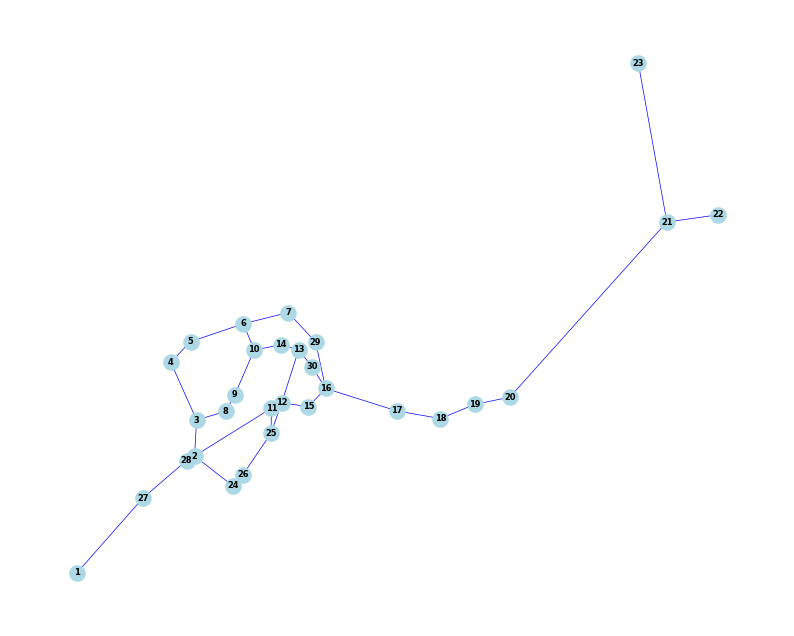

In [10]:
draw_rotated_graph(G2)

In [11]:
import pandas as pd
od_df = pd.read_csv('../../data/Origin-Demand-Kinshasa.csv',sep=";")
od_df_u = od_df.drop(columns=['Car','Motor Cycle','Taxi','Taxibus','Bus'])
od_df_u.head(20)
#od_df.head()

,O-Description,Origin Label,D-Description,Destination Label,Demand,Unit,Normalised Unit (pcu/day),Tag
0,Gombe,7.0,Airport,19.0,1000.0,pax/day,200.0,To-Ndjili-Airport
1,Sendwe,14.0,Airport,19.0,250.0,pax/day,50.0,To-Ndjili-Airport
2,Triomphal,13.0,Airport,19.0,250.0,pax/day,50.0,To-Ndjili-Airport
3,24 Nov,10.0,Airport,19.0,750.0,pax/day,150.0,To-Ndjili-Airport
4,Ngaliema,5.0,Airport,19.0,500.0,pax/day,100.0,To-Ndjili-Airport
5,UPN,8.0,Airport,19.0,250.0,pax/day,50.0,To-Ndjili-Airport
6,Cite Verte,2.0,Airport,19.0,250.0,pax/day,50.0,To-Ndjili-Airport
7,Ront Point,12.0,Airport,19.0,250.0,pax/day,50.0,To-Ndjili-Airport
8,Lemba,15.0,Airport,19.0,250.0,pax/day,50.0,To-Ndjili-Airport
9,Echangeur,16.0,Airport,19.0,500.0,pax/day,100.0,To-Ndjili-Airport


In [12]:
summed_df = (
    od_df_u.groupby(['Origin Label', 'Destination Label'], as_index=False)
    .agg({'Normalised Unit (pcu/day)': 'sum'})
)
summed_df['Origin Label']=summed_df['Origin Label'].apply(lambda x: int(x))
summed_df['Destination Label']=summed_df['Destination Label'].apply(lambda x: int(x))

# Swap O and D whenever Origin > Destination
mask = summed_df['Origin Label'] > summed_df['Destination Label']
summed_df.loc[mask, ['Origin Label', 'Destination Label']] = summed_df.loc[mask, ['Destination Label', 'Origin Label']].values
summed_df

,Origin Label,Destination Label,Normalised Unit (pcu/day)
0,1,2,509.0
1,1,4,254.0
2,1,5,759.0
3,1,7,1013.0
4,1,9,339.0
5,1,10,1013.0
6,1,12,1259.0
7,1,13,2263.0
8,1,14,1513.0
9,1,15,254.0


In [13]:
#summed_df['Normalised Unit (pcu/day)'].mean()

In [14]:
len(summed_df)

58

In [15]:
import numpy as np
import pandas as pd
# ---- Parameters ----
n = 30  # number of zones
# ---- Create empty matrix ----
matrix = np.zeros((n, n), dtype=int)
# ---- MANUAL ENTRY: fill lower triangle (i > j) ----
# Fill in order: (1,0), (2,0), (2,1), (3,0), (3,1), (3,2), ... until (26,25)

for i in range(len(summed_df)):
    matrix[summed_df.loc[i,'Origin Label']-1,summed_df.loc[i,'Destination Label']-1] = summed_df.loc[i,'Normalised Unit (pcu/day)']
    
# ... continue filling only where i > j
# For instance:
# matrix[i, j] = your_value   # with i > j
# ---- Duplicate lower triangle to upper ----
matrix = matrix + matrix.T

# ---- Zero diagonal ----
np.fill_diagonal(matrix, 0)
#d=500
d=100
matrix = matrix/d

matrix_c = matrix.copy()
matrix_c = np.round(matrix_c,1)
# ---- Create DataFrame ----
df = pd.DataFrame(matrix_c, index=range(1, n+1), columns=range(1, n+1))

# ---- Preview ----
print(df.head())

# ---- Export to LaTeX body ----
latex_body = ""
for i, row in enumerate(df.values, start=1):
    latex_body += f"{i} & " + " & ".join(map(str, row)) + " \\\\\n"

with open("data/matrix_body.tex", "w") as f:
    f.write(latex_body)

print("\n✅ Symmetric OD matrix saved to matrix_body.tex")




    1    2    3    4    5    6     7    8    9     10  ...   21   22   23  \
1  0.0  5.1  0.0  2.5  7.6  0.0  10.1  0.0  3.4  10.1  ...  0.0  0.0  0.0   
2  5.1  0.0  0.0  0.0  0.0  0.0   0.1  0.0  0.0   0.0  ...  0.0  2.5  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  ...  0.0  0.0  0.0   
4  2.5  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  ...  0.0  0.0  0.0   
5  7.6  0.0  0.0  0.0  0.0  0.0   0.2  0.0  0.0  20.0  ...  0.0  3.5  0.0   

    24   25   26   27   28    29    30  
1  0.0  0.0  0.0  0.0  0.0   0.0   0.0  
2  0.0  0.0  0.0  0.0  0.0  25.0  25.0  
3  0.0  0.0  0.0  0.0  0.0   0.0   0.0  
4  0.0  0.0  0.0  0.0  0.0   0.0   0.0  
5  0.0  0.0  0.0  0.0  0.0  15.0  15.0  

[5 rows x 30 columns]

✅ Symmetric OD matrix saved to matrix_body.tex


In [16]:
from joblib import dump, load

# ---- Convert matrix to dictionary {(i, j): demand} ----
demand_dict = {(i+1, j+1): matrix[i, j]
               for i in range(n) for j in range(n)
               if i != j and matrix[i, j] > 0}

# ---- Save object using joblib ----
dump(demand_dict, "../../data/od_demand.joblib")
print("✅ OD demand dictionary saved to 'od_demand.joblib'.")

✅ OD demand dictionary saved to 'od_demand.joblib'.


In [17]:
#Optimisation Preparation
import networkx as nx
Gs = Gc.copy()
Gs.remove_edges_from(G0.edges())
print('[0] Initial Network:',G0, '\n[1] Complete Network:', Gc,'\n[2] Solution Network:',Gs)
#candidate solution
Gi = G0
def get_simple_paths(Gi, r, s):
  return list(nx.all_simple_paths(Gi,source=r,target=s))

[0] Initial Network: Graph with 30 nodes and 34 edges 
[1] Complete Network: Graph with 30 nodes and 435 edges 
[2] Solution Network: Graph with 30 nodes and 401 edges
